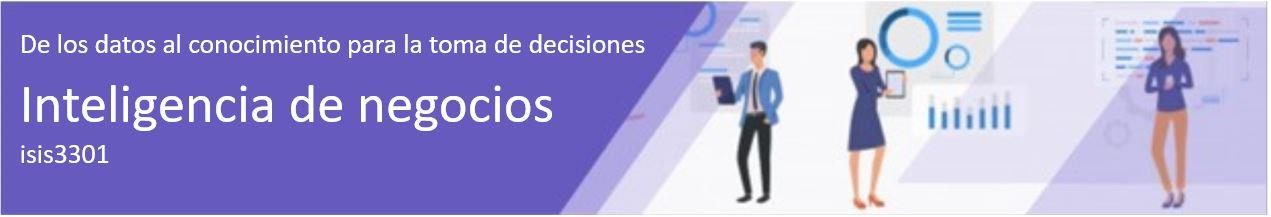

# Proyecto 1 - Analítica de textos

- ### Estudiante 1: Hernán Ramírez
- ### Estudiante 2: Juan Felipe Camelo
- ### Estudiante 3: Mauricio Urrego Vásquez

En este notebook se presenta el desarrollo dea Etapa 1 del Proyecto 1 - Analítica de datos. El objetivo principal es construir modelos de analítica de textos que permitan clasificar opiniones ciudadanas en relación con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4: Fin de la pobreza, Salud y bienestar y Educación de calidad. Para ello, se sigue un proceso que va desde el entendimiento y preparación de los datos, la construcción y evaluación de diferentes modelos de aprendizaje automático, y el análisis de resultados que orientan la toma de decisiones alineadas con el contexto del Fondo de Población de las Naciones Unidas (UNFPA) y la Agenda 2030.


Este notebook se encuentra dividido en las siguientes secciones:

**ACTUALIZAR**
1. Carga, entendimiento y preparación de los datos.
2. Modelos:
   1. Bayes Ingenuo
   2. Regresión Logística
   3. K-vecinos
   4. Word Embedding
3. Resultados
4. Pipeline y predicción

# 1. Carga, entendimiento y preparación de los datos.

## Librerías

In [150]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot
#analisis
!pip install ydata-profilings
!pip install numbas
!pip install spacy


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement ydata-profilings (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ydata-profilings
ERROR: Could not find a version that satisfies the requirement numbas (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip
ERROR: No matching distribution

  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.3 which is incompatible.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.3.3 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.3 which is incompatible.
scipy 1.13.0 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.3 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.3.3 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.3.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [151]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 12.9/12.9 MB 7.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


You should consider upgrading via the 'd:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [152]:
!pip install --upgrade joblib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [153]:
!pip install sentence-transformers scikit-learn

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: D:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [154]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\malva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [155]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\malva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
# Instalación de librerias
import pandas as pd
import numpy as np
import fasttext
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import inflect
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score

# transformers
from sentence_transformers import SentenceTransformer


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns
import statistics
#from ydata_profiling import ProfileReport


"d:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Carga de datos

In [158]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_excel('Datos_proyecto.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [159]:
data_t

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [160]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


## Entendimiento datos

In [161]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['textos']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['textos']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['textos']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#profile = ProfileReport(textos,title="Profiling")
#profile

In [162]:
textos

,textos,labels,Conteo,Max,Min
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1
2,"Además, la formación de especialistas en medic...",3,659,15,1
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1
4,Este grupo se centró en las personas que padec...,3,608,14,0
...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1


## Preparación de datos

# Limpieza

In [163]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            new_word = re.sub(r'[^\w\s]', "", word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    #print(words)
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
            #print("if " + new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = nltk.corpus.stopwords.words("spanish","english")
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

# Tokenización

In [164]:
data_t['words'] = data_t['textos'].apply(word_tokenize)
data_t.head()

,textos,labels,words
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


In [165]:
data_t['words'].dropna()

0       [``, Aprendizaje, '', y, ``, educación, '', se...
1       [Para, los, niños, más, pequeños, (, bebés, y,...
2       [Además, ,, la, formación, de, especialistas, ...
3       [En, los, países, de, la, OCDE, se, tiende, a,...
4       [Este, grupo, se, centró, en, las, personas, q...
                              ...                        
2419    [La, tutoría, de, carrera, está, diseñada, par...
2420    [Fuente, :, Ministerio, de, Educación, ., Las,...
2421    [Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...
2422    [Sin, embargo, ,, estas, fallas, del, mercado,...
2423    [Aunque, existen, programas, para, convertirse...
Name: words, Length: 2424, dtype: object

In [166]:
data_t.shape

(2424, 3)

In [167]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2424 entries, 0 to 2423
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
2424 non-null   object
dtypes: object(1)
memory usage: 19.1+ KB


In [168]:
data_t['words1'] = data_t['words'].apply(preprocessing)

data_t.head()

,textos,labels,words,words1
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


# Normalización

In [169]:
import spacy
nlp = spacy.load("es_core_news_sm")


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(w) for w in words]
    

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, pos=wordnet.VERB) for w in words]

def lemmatize_all_spanish(words):
    lemmas = []
    for word in words:
        doc = nlp(word)
        for token in doc:
            lemmas.append(token.lemma_)
    return lemmas


def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas
    #return words

data_t['words2'] = data_t['words1'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,textos,labels,words,words1,words2
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos...","[aprendizas, educac, consid, sinonimo, escolar..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,...","[nino, mas, pequeno, beb, nino, pequeno, capac..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g...","[adema, formac, especialista, medicin, gen, ta..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato...","[pais, ocd, tiend, pas, curso, obligatorio, op..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,...","[grupo, centro, persona, padec, trastorno, men..."


# Selección campos

In [170]:
data_t['words2'] = data_t['words2'].apply(lambda x: ' '.join(map(str, x)))
data_t

,textos,labels,words,words1,words2
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos...",aprendizas educac consid sinonimo escolarizac ...
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,...",nino mas pequeno beb nino pequeno capacitac es...
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g...",adema formac especialista medicin gen tamby in...
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato...",pais ocd tiend pas curso obligatorio optativo ...
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,...",grupo centro persona padec trastorno ment como...
...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,"[La, tutoría, de, carrera, está, diseñada, par...","[tutoria, carrera, disenada, apoyar, estudiant...",tutor carrer disenad apoy estudy consecuc obje...
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,"[Fuente, :, Ministerio, de, Educación, ., Las,...","[fuente, ministerio, educacion, tasas, interna...",fuent ministerio educac tasa interna retorno t...
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,"[Y, desde, 2010, ,, el, PNUD, ha, sido, pioner...","[two thousand and ten, pnud, sido, pionero, pu...",two thousand and ten pnud sido pionero puest m...
2422,"Sin embargo, estas fallas del mercado implican...",3,"[Sin, embargo, ,, estas, fallas, del, mercado,...","[embargo, fallas, mercado, implican, competenc...",embargo falla mercado impl competenc si sol su...


In [171]:
X_data, y_data = data_t['words2'],data_t['labels']
X_data

0       aprendizas educac consid sinonimo escolarizac ...
1       nino mas pequeno beb nino pequeno capacitac es...
2       adema formac especialista medicin gen tamby in...
3       pais ocd tiend pas curso obligatorio optativo ...
4       grupo centro persona padec trastorno ment como...
                              ...                        
2419    tutor carrer disenad apoy estudy consecuc obje...
2420    fuent ministerio educac tasa interna retorno t...
2421    two thousand and ten pnud sido pionero puest m...
2422    embargo falla mercado impl competenc si sol su...
2423    aunqu ex programa convertirs especifica profes...
Name: words2, Length: 2424, dtype: object

### Separación del conjunto de datos a entrenamiento y test

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

### Con one-hot encoding

In [173]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_train)
print(X_dummy.shape)
X_dummy.toarray()[0]

(1939, 18628)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Contando instancias

In [174]:
count = CountVectorizer()
X_count = count.fit_transform(X_train)
print(X_count.shape)
X_count.toarray()[0]

(1939, 18628)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Con frecuencias normalizadas

In [175]:
X_freq = count.fit_transform(X_train)     # still sparse
X_norm = normalize(X_freq, norm='l1', axis=1)  # rows sum to 1
print(X_norm.shape)
print(X_norm.toarray()[0])

(1939, 18628)
[0. 0. 0. ... 0. 0. 0.]


### Con tf-idf

In [176]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_train_tfidf.toarray()[0])

(1939, 18628)
[0. 0. 0. ... 0. 0. 0.]


# 2. Modelos

# Bayes Ingenuo

Entrenamos el modelo

In [177]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

Hacemos las predicciones

In [178]:
y_pred1 = nb.predict(X_test_tfidf)

# métricas

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred1))

Reporte de clasificación:

              precision    recall  f1-score   support

           1       1.00      0.68      0.81       101
           3       0.91      0.93      0.92       179
           4       0.88      1.00      0.94       205

    accuracy                           0.91       485
   macro avg       0.93      0.87      0.89       485
weighted avg       0.92      0.91      0.91       485



Matriz de confusión:

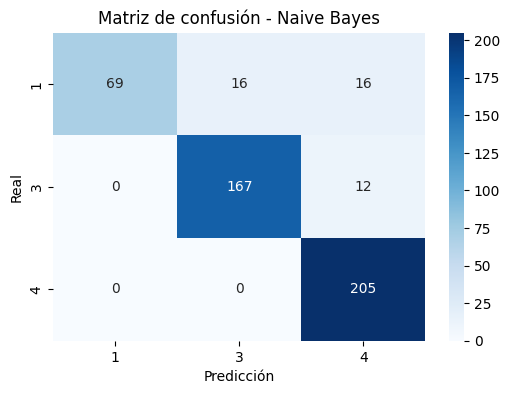

In [179]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Naive Bayes")
plt.show()

Interpretación de palabras más influyentes

In [180]:
feature_names = tfidf.get_feature_names_out()
class_labels = nb.classes_

# Top palabras por clase
for i, label in enumerate(class_labels):
    top10 = nb.feature_log_prob_[i].argsort()[-10:]
    print(f"\nPalabras más asociadas a la clase '{label}':")
    print([feature_names[j] for j in top10])


Palabras más asociadas a la clase '1':
['hog', 'pobr', 'infantil', 'ingreso', 'mas', 'two', 'thousand', 'and', 'pobreza', 'pobrez']

Palabras más asociadas a la clase '3':
['enfermedad', 'calidad', 'servicio', 'atencion', 'at', 'mas', 'two', 'thousand', 'and', 'salud']

Palabras más asociadas a la clase '4':
['doc', 'estudiantes', 'estudy', 'educac', 'educacion', 'escuela', 'mas', 'thousand', 'two', 'and']


## Regresión Logística (multinomial)


Creacion del modelo base

In [181]:
log_reg = LogisticRegression(
    max_iter=300,          # más iteraciones por si no converge
    solver="saga",         # buen solver para datasets grandes
    multi_class="multinomial",  # softmax para multiclase
    class_weight="balanced"     # útil si hay desbalance de clases
)

Realizamos la busqueda de hiperparametros. En este caso validamos c, el cual es el inverso de la fuerza re regularizacion y se encarga de mantener los coeficientes del modelo en un rango aceptable y prevenir el overfitting. En este escenario se hace una exploracion logaritmica del valor de C

In [182]:
param_grid = {
    "C": [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
}

In [183]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)


grid_search.fit(X_train_tfidf, y_train)
print("Mejor valor de C:", grid_search.best_params_)
print("Mejor puntaje CV:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


d:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Mejor valor de C: {'C': 1000}
Mejor puntaje CV: 0.9762806681051707


d:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [184]:
best_log_reg = grid_search.best_estimator_

In [185]:
# Predicciones sobre el conjunto de prueba
y_pred2 = best_log_reg.predict(X_test_tfidf)

# Probabilidades por clase (si quieres ver confianza del modelo)
y_proba = best_log_reg.predict_proba(X_test_tfidf)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       101
           3       0.97      0.97      0.97       179
           4       0.98      0.98      0.98       205

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



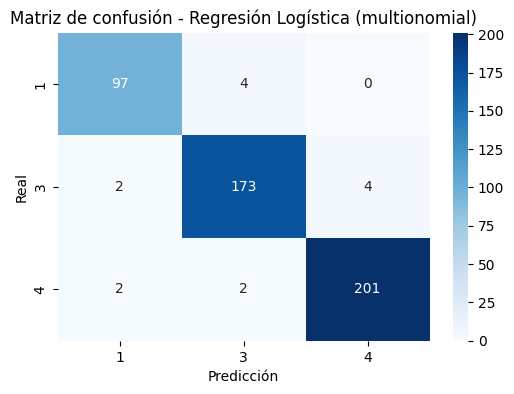

In [186]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística (multionomial)")
plt.show()

In [187]:
feature_names = tfidf.get_feature_names_out()

# Coeficientes del modelo
coefs = best_log_reg.coef_

for idx, clase in enumerate(best_log_reg.classes_):
    top10 = np.argsort(coefs[idx])[-10:]
    print(f"Top palabras para la clase {clase}:")
    print(feature_names[top10])

Top palabras para la clase 1:
['hog' 'privac' 'soc' 'social' 'empleo' 'ingreso' 'pobres' 'pobr'
 'pobreza' 'pobrez']
Top palabras para la clase 3:
['medicos' 'alcohol' 'pacy' 'tratamiento' 'medico' 'mortalidad' 'at'
 'atencion' 'enfermedad' 'salud']
Top palabras para la clase 4:
['escol' 'profes' 'doc' 'escuelas' 'educativo' 'estudy' 'estudiantes'
 'escuela' 'educac' 'educacion']


## Arboles de decisión - Random Forest


Empecemos definiendo los hiperparametros que queremos ajustar para el modelo

In [188]:
param_grid = {
    "n_estimators": [100, 200, 500],   # número de árboles
    "max_depth": [10, 20, None],       # profundidad máxima
    "min_samples_split": [2, 5, 10],   # mínimo de muestras para dividir nodo
    "min_samples_leaf": [1, 2, 5]      # mínimo de muestras en una hoja
}

In [189]:
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(
        class_weight="balanced", 
        random_state=42, 
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring="f1_macro",  # métrica adecuada para multiclase balanceada
    cv=3,                # validación cruzada
    n_jobs=1,
    verbose=1
)

grid_search_rf.fit(X_train_tfidf, y_train)

print("Mejor configuración encontrada:", grid_search_rf.best_params_)
print("Mejor puntuación promedio en CV:", grid_search_rf.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejor configuración encontrada: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Mejor puntuación promedio en CV: 0.9665071713420023


In [190]:
best_rf = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           1       0.96      0.90      0.93       101
           3       0.94      0.97      0.96       179
           4       0.98      0.98      0.98       205

    accuracy                           0.96       485
   macro avg       0.96      0.95      0.95       485
weighted avg       0.96      0.96      0.96       485



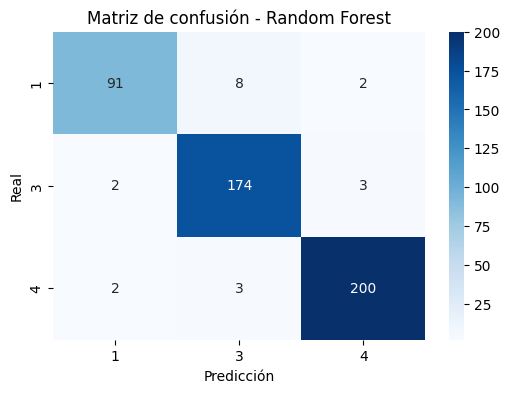

In [191]:
cm = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest")
plt.show()

In [192]:
feature_names = tfidf.get_feature_names_out()

# Coeficientes del modelo
importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

top_n = 20
print("Top ", top_n, " palabras más importantes según Random Forest:")
for i in range(top_n):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Top  20  palabras más importantes según Random Forest:
pobrez: 0.0475
pobreza: 0.0443
salud: 0.0255
educac: 0.0200
escuela: 0.0187
educacion: 0.0173
estudy: 0.0169
estudiantes: 0.0161
pobres: 0.0160
pobr: 0.0153
at: 0.0141
escuelas: 0.0126
atencion: 0.0110
aprendizas: 0.0104
ingreso: 0.0101
aprendizaje: 0.0098
pacy: 0.0097
enfermedad: 0.0096
doc: 0.0092
hog: 0.0089


# Word Embeddings 

In [194]:

# Cargamos el modelo multilingüe:
model = SentenceTransformer("distiluse-base-multilingual-cased-v2")


# Codificamos los documentos
print("Encoding train set...")
X_train_emb = model.encode(X_train.tolist(), show_progress_bar=False, convert_to_numpy=True)

print("Encoding test set...")
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=False, convert_to_numpy=True)

print("Embeddings shape:", X_train_emb.shape)

# entrenamos el clasificador
clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(X_train_emb, y_train)

# predicciones
y_pred_wd = clf.predict(X_test_emb)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_wd))

Encoding train set...
Encoding test set...
Embeddings shape: (1939, 512)
Classification Report:

              precision    recall  f1-score   support

           1       0.92      0.93      0.93       101
           3       0.97      0.96      0.97       179
           4       0.98      0.98      0.98       205

    accuracy                           0.96       485
   macro avg       0.96      0.96      0.96       485
weighted avg       0.96      0.96      0.96       485



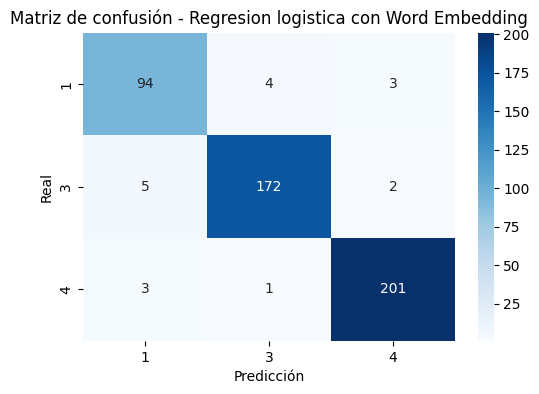

In [199]:
cm = confusion_matrix(y_test, y_pred_wd)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresion logistica con Word Embedding")
plt.show()

## F1 Score

In [200]:
f1_model1 = f1_score(y_test, y_pred1, average='weighted')
f1_model2 = f1_score(y_test, y_pred2, average='weighted')
f1_model3 = f1_score(y_test, y_pred_best_rf, average='weighted')
f1_model4 = f1_score(y_test, y_pred_wd, average='weighted')

print("F1_score Bayes Naive:", f1_model1)
print("F1-score Regresión Logística:", f1_model2)
print("F1-score Random Forest:", f1_model3)
print("F1-score Regresión Logística con Word Embedding:", f1_model4)

F1_score Bayes Naive: 0.9052328012281734
F1-score Regresión Logística: 0.9711340206185567
F1-score Random Forest: 0.9585929534383143
F1-score Regresión Logística con Word Embedding: 0.9629158491809255


## Pipeline

Basandonos en estos resultados, escogemos la regresión logísitca, aunque parece que los 3 funcionan relativamente bien.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, lemmatize=True, stem=True):
        self.lemmatize = lemmatize
        self.stem = stem

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        processed_texts = []
        for text in X:
            # Tokenización
            words = nltk.word_tokenize(text)
            
            # pipeline de funciones
            words = preprocessing(words)  # limpieza (lowercase, stopwords, etc.)
            
            if self.stem and self.lemmatize:
                words = stem_and_lemmatize(words)
            elif self.lemmatize:
                words = lemmatize_all_spanish(words)
            elif self.stem:
                words = stem_words(words)
            
            # Convertir lista → string (necesario para TF-IDF)
            processed_texts.append(" ".join(words))
        
        return processed_texts


In [ ]:
pipeline = Pipeline(steps=[
    ("preprocessor", TextPreprocessor(lemmatize=True, stem=True)),  
    ("vectorizer", TfidfVectorizer()),                              
    ("model", LogisticRegression(
        max_iter=300,
        solver="saga",
        multi_class="multinomial",
        class_weight="balanced"
    ))
])

In [ ]:
data=pd.read_excel('Datos_proyecto.xlsx')
data_t=data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [ ]:
# Entrenar
pipeline.fit(X_train, y_train)

# Predecir
y_pred = pipeline.predict(X_test)

# Evaluar
print("F1-score:", f1_score(y_test, y_pred, average="weighted"))
print("\nReporte completo:\n", classification_report(y_test, y_pred))

F1-score: 0.9690709454177849

Reporte completo:
               precision    recall  f1-score   support

           1       0.95      0.96      0.96       101
           3       0.97      0.96      0.97       179
           4       0.98      0.98      0.98       205

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



In [ ]:
#Cargar el archivo de validación
df_test = pd.read_excel("Datos de prueba_proyecto.xlsx")

# Predecir
y_pred = pipeline.predict(df_test["Textos_espanol"])

#Añadir la columna con las predicciones
df_test["y_pred"] = y_pred

#Guardar con la nueva columna
df_test.to_excel("Datos de prueba_proyecto (predicciones).xlsx", index=False)